In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.stats.api as sms
from scipy.stats import (ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,
                         pearsonr, spearmanr, kendalltau, f_oneway, kruskal)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison


In [2]:
# TODO : Import the Data from the kaggle API
df = pd.read_csv('/content/AB_Test_Results.csv')
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


# Data Understanding

In [3]:
#TODO : compute the following : DataFrame Information, Columns in DataFrame, Counting Missing Values, Descriptive Statistics, Value Counts for VARIANT_NAME, Counting Unique Users in USER_ID
print('## DataFrame Information : ')
print(df.info())

print('\n## Columns in DataFrame : ')
print(df.columns)

print('\n## Counting Missing Values : ')
print(df.isnull().sum())

print('\n## Descriptive Statistics : ')
print(df.describe())

print('\n## Value Counts for VARIANT_NAME : ')
print(df['VARIANT_NAME'].value_counts())

print('\n## Counting Unique Users in USER_ID : ')
print(df['USER_ID'].nunique())

## DataFrame Information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB
None

## Columns in DataFrame : 
Index(['USER_ID', 'VARIANT_NAME', 'REVENUE'], dtype='object')

## Counting Missing Values : 
USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

## Descriptive Statistics : 
            USER_ID       REVENUE
count  10000.000000  10000.000000
mean    4981.080200      0.099447
std     2890.590115      2.318529
min        2.000000      0.000000
25%     2468.750000      0.000000
50%     4962.000000      0.000000
75%     7511.500000      0.000000
max    10000.000000    196.010000

## Value Counts for VARIANT_NAME : 
VARIANT_NAME
variant

# Average Revenue by VARIANT_NAME

In [4]:
# Average Revenue by VARIANT_NAME
average_revenue_by_variant = df.groupby('VARIANT_NAME')['REVENUE'].mean().reset_index()
print('## Average Revenue by VARIANT_NAME : ')
display(average_revenue_by_variant)

## Average Revenue by VARIANT_NAME : 


,VARIANT_NAME,REVENUE
0,control,0.129013
1,variant,0.070070


What if H0: M1 = M2 ?
What about H1: M1 1= M2 ?

# Assumptions Control:
*# 1- Normality Assumptions*
*# 2- Homogeneity of Variances Assumption*

In [5]:
# TODO : test the normality of revenue data in two groups (variant and control) within your DataFrame df using the Shapiro-Wilk test, what can you conclude ?


# split the data into the two groups
variant_revenue = df[df['VARIANT_NAME'] == 'variant']['REVENUE']
control_revenue = df[df['VARIANT_NAME'] == 'control']['REVENUE']

# perform the Shapiro-Wilk test for each group
shapiro_variant = shapiro(variant_revenue)
shapiro_control = shapiro(control_revenue)

# check results
print("## Shapiro-Wilk Test for Variant Group:")
print(f"Statistic: {shapiro_variant.statistic}, p-value: {shapiro_variant.pvalue}")

print("\n## Shapiro-Wilk Test for Control Group:")
print(f"Statistic: {shapiro_control.statistic}, p-value: {shapiro_control.pvalue}")

## Shapiro-Wilk Test for Variant Group:
Statistic: 0.027033073451830147, p-value: 2.7310104028899288e-95

## Shapiro-Wilk Test for Control Group:
Statistic: 0.01833147442513483, p-value: 2.4983285100057203e-95


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5016.
  res = hypotest_fun_out(*samples, **kwds)


Both groups have p << 0.05, we reject H0 for both (H0 for S-W test is that the data is normally distributed).

**זהירות**: the sample size is too big for this test (For N > 5000, computed p-value may not be accurate. Current N is 5016.)

In [6]:
# TODO : test for the homogeneity of variances between two groups (variant and control) within your DataFrame df using the Levene's test,  what can you conclude ?

# perform Levene's test
levene_variant, levene_control = levene(variant_revenue, control_revenue)

# check results
print("## Levene's Test for Variant Group:")
print(f"Statistic: {levene_variant}, p-value: {levene_variant}")

## Levene's Test for Variant Group:
Statistic: 1.6158565214488871, p-value: 1.6158565214488871


The p-value is much larger than the conventional significance level of 0.05. We cant reject $H_{0}$ of Levene's test.

levene's $H_{0}$ is that the population variances are equal (i.e., homogeneity of variances).

# Non-Parametric Test (mannwhitneyu Test)

In [7]:
# TODO : perform the Mann-Whitney U test for comparing the average revenue between the variant and control groups in your DataFrame, what can you conclude ?

# mann whitney
u_stat, p_value = mannwhitneyu(variant_revenue, control_revenue)

# check results
print("## Mann-Whitney U Test:")
print(f"U-statistic: {u_stat}, p-value: {p_value}")

## Mann-Whitney U Test:
U-statistic: 12478180.0, p-value: 0.47825247965294926


we see $p_{M-W} > 0.05$ therefore there is no significant difference in average revenue between the variant and control groups

cant reject $H_{0}$

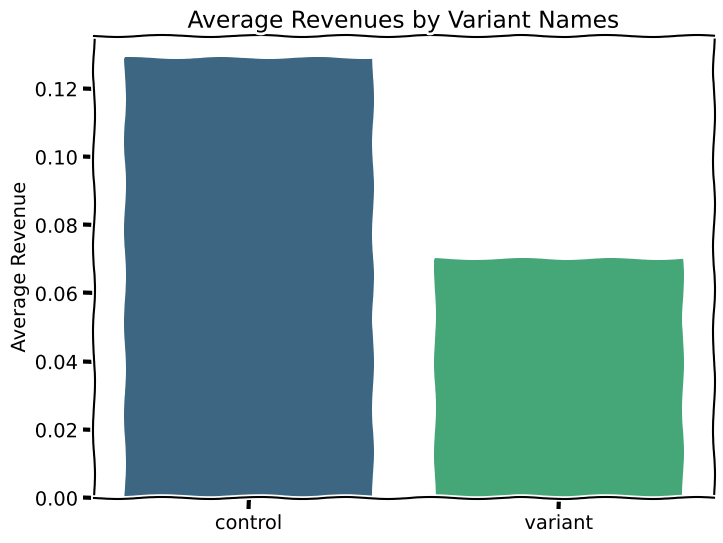

In [8]:
# TODO : create a bar plot showing the average revenues by variant names using the seaborn library

import matplotlib.font_manager as fm
font_path = fm.findfont('DejaVu Sans')
prop = fm.FontProperties(fname=font_path)

plt.xkcd()  # Enable XKCD style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'

plt.figure(figsize=(8, 6))
sns.barplot(x='VARIANT_NAME', y='REVENUE', data=average_revenue_by_variant, hue='VARIANT_NAME' , palette='viridis')
plt.title('Average Revenues by Variant Names')
plt.xlabel('') # redundant
plt.ylabel('Average Revenue')
plt.show()